## LOGISTIC REGRESSION:

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes

In [68]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # we want to have a a seperation of training and 
# testing data

# 0) preparing the data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler() # makes it have 0 unit variance, useful with logistic regression
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# note: fit_transform will fit the transformer to x and then transform the data
# if you only use transform you must have called the fit method before
# (can transform your x_test based on the x_train fitting)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1) #reshapes tensor with given size 1 column
y_test = y_test.view(y_test.shape[0],1)

# 1) set up the model
# f = wx + b, sigmoid function
class LogisticRegression(nn.Module): #derived from nn.Module
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
        
model = LogisticRegression(n_features)

# 2) set up the loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) set up the training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero the gradients (empty them before next iteration)
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
with torch.no_grad(): # if we dont use this statement then y_predicted.round() would be part of the graph
    y_predicted = model(X_test) #gets predicted classes
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0]) 
    #for every prediction that is correct it will add + 1, 
    # we then divide it by the number of samples
    
    print(f'accuracy = {acc:.4f}')
    
    

epoch: 10, loss = 0.5860
epoch: 20, loss = 0.4921
epoch: 30, loss = 0.4300
epoch: 40, loss = 0.3858
epoch: 50, loss = 0.3525
epoch: 60, loss = 0.3265
epoch: 70, loss = 0.3054
epoch: 80, loss = 0.2879
epoch: 90, loss = 0.2731
epoch: 100, loss = 0.2603
accuracy = 0.8772


## DATASET AND DATALOADER CLASSES:

We optimized model based on whole dataset, which can be very time consuming. A better way for larger datasets is dividing data into smaller batches.

In [ ]:
# training loop
for epoch in range(1000):
    #loop over all batches
    for i in range(total_batches):
        x_batch, y_batch = ...



Terms:
Epoch = 1 forward and backward pass of all training samples
batch_size = number of training samples in one forward and backward pass
number of iterations = number of passes, each pass using [batch_size] number of samples
e.g. 100 samples, batch_size = 20 -> 100/20 = 5 iterations per epoch

In [3]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    
    def __init__(self):
        # data loading
        xy = np.loadtxt('./data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1) #skiprows skips first row (header)
        self.x = torch.from_numpy(xy[:, 1:]) #slicing samples, we dont want very first column, so 1 till end.
        # torch.from_numpy() converts to tensors
        self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
        self.n_samples = xy.shape[0] #get number of samples
        
    def __getitem__(self, index):
        # datset[0]
        return self.x[index], self.y[index] #returns a tupple
        
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
dataset = WineDataset()

''' This is how we get the dataset and check if its working
first_data = dataset[0]
features, labels = first_data #unpack it
print(features,labels)
'''

# how to use dataloader:
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2) #shuffle is useful for training
# num_workers uses multiple subprocessors
datatiter = iter(dataloader) # convert to iterator
data = datatiter.next() # calls next 
features, labels = data # unpack this
print(features, labels)

# Training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4) #4 is the batch size
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader): # enumerate function gives index and inputs/labels (already unpacked)
        # forward-backward pass, update weights
        if (i+1) % 5 == 0: # printing info every 5th step
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}') #prints the batches
            
torchvision.datasets.MNIST() # popular dataset
#fashion-mnist

OSError: ./data/wine/wine.csv not found.

## DATASET TRANSFORMS:


In [16]:
import torch
import torchvision
dataset = torchvision.datasets.MNIST(root='MNIST/', transform=torchvision.transforms.ToTensor, download=True)
# tensor transform converts image arrays to tensors, can also centercrop,grayscale etc USEFUL FOR FUNGI!


## SOFTMAX AND CROSS ENTROPY:

read into softmax/cross entropy

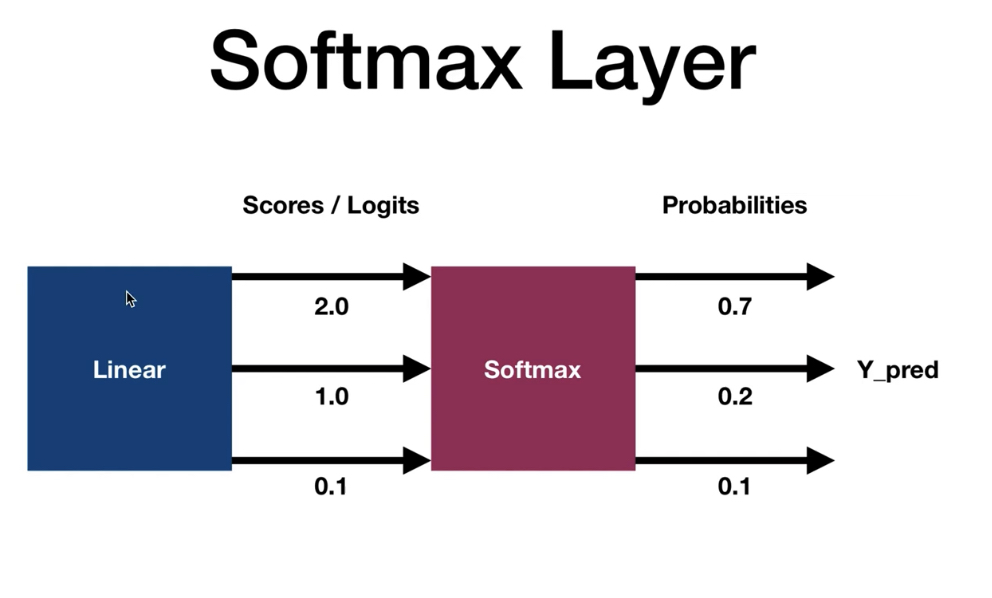

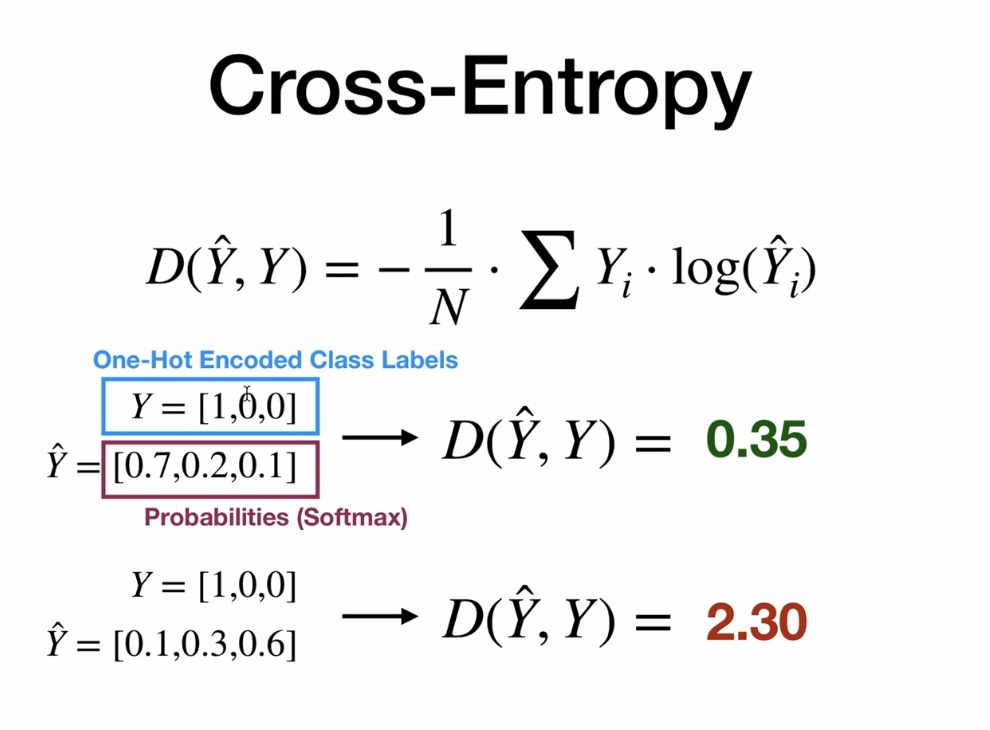

In [18]:
import torch
import torch.nn as nn
import numpy as np

x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x, dim=0) # applies softmax function
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


In [22]:
## apply cross entropy

import torch
import torch.nn as nn
import numpy as np

#note CrossEntropyLoss already applies nn.LogSoftmax + nn.NLLLoss (neg. log likelihood loss)
# no softmax in last layer needed
# y has class labels, not One-Hot, put correct class label
# y_pred has raw scores (logits), no softmax here

loss = nn.CrossEntropyLoss()

# 3 samples (3 possible classes)
Y = torch.tensor([2, 0, 1])
# nsamples x n classes = 3 x 3 = 3
Y_pred_good = torch.tensor([[0.1,1.0,2.1], [2.0,1.0,0.1], [0.1,3.0,0.1]]) #note the order of the highest values corresponds
#to the position in Y = torch.tensor..
Y_pred_bad = torch.tensor([[2.1,1.0,0.1], [0.1,1.0,2.1], [0.1,3.0,0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

# good prediction has lower entropy loss

#to get actual prediction:

_, predictions1 = torch.max(Y_pred_good, 1) #along the 1st dim
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

0.3018244206905365
1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


The following is a multiclass problem: 

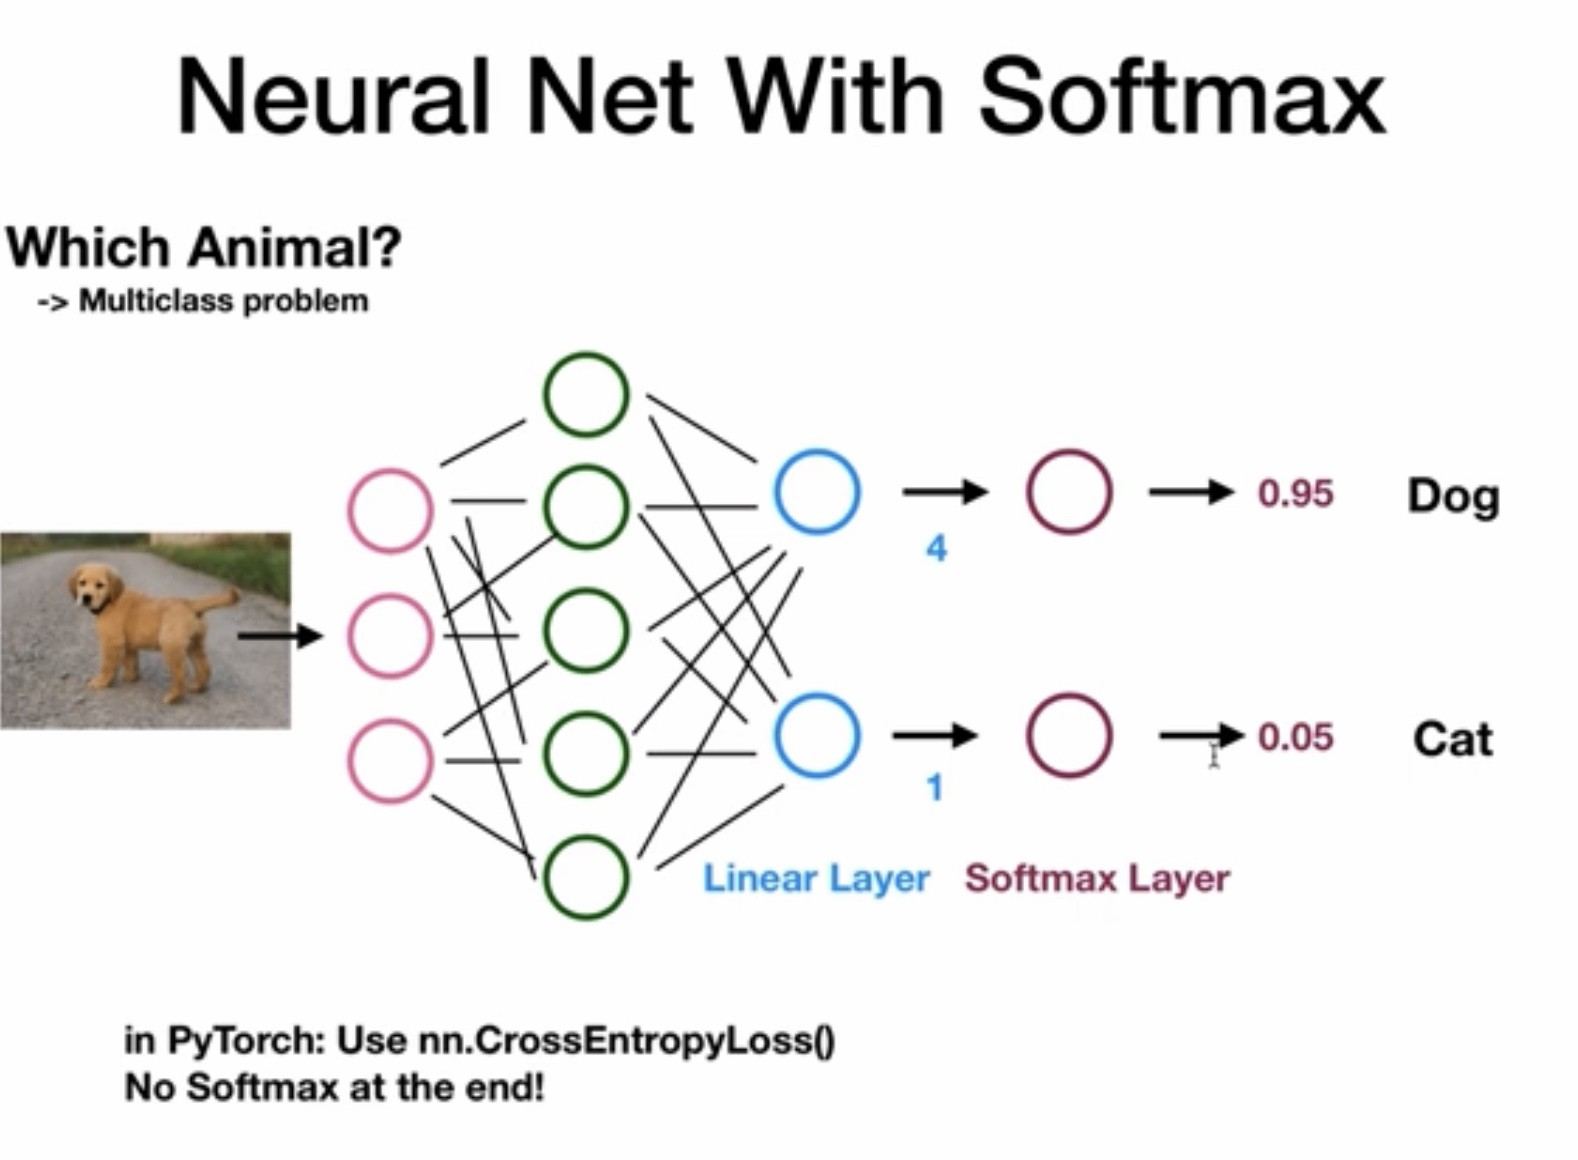

In [ ]:
import torch
import torch.nn as nn
import numpy as np

class NeuralNet2(nn.Module):
def __init__(self, input_size, hidden_size, num_classes):
super(NeuralNet2, self).__init__()
self.linear1 = nn.Linear(input_size, hidden_size) 
self.relu = nn.ReLU()
self.linear2 = nn.Linear(hidden_size, num_classes)  
def forward(self, x):
out = self.linear1(x)
out = self.relu(out)
out = self.linear2(out)
# no softmax at the end
return out
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

The following is a binary problem:
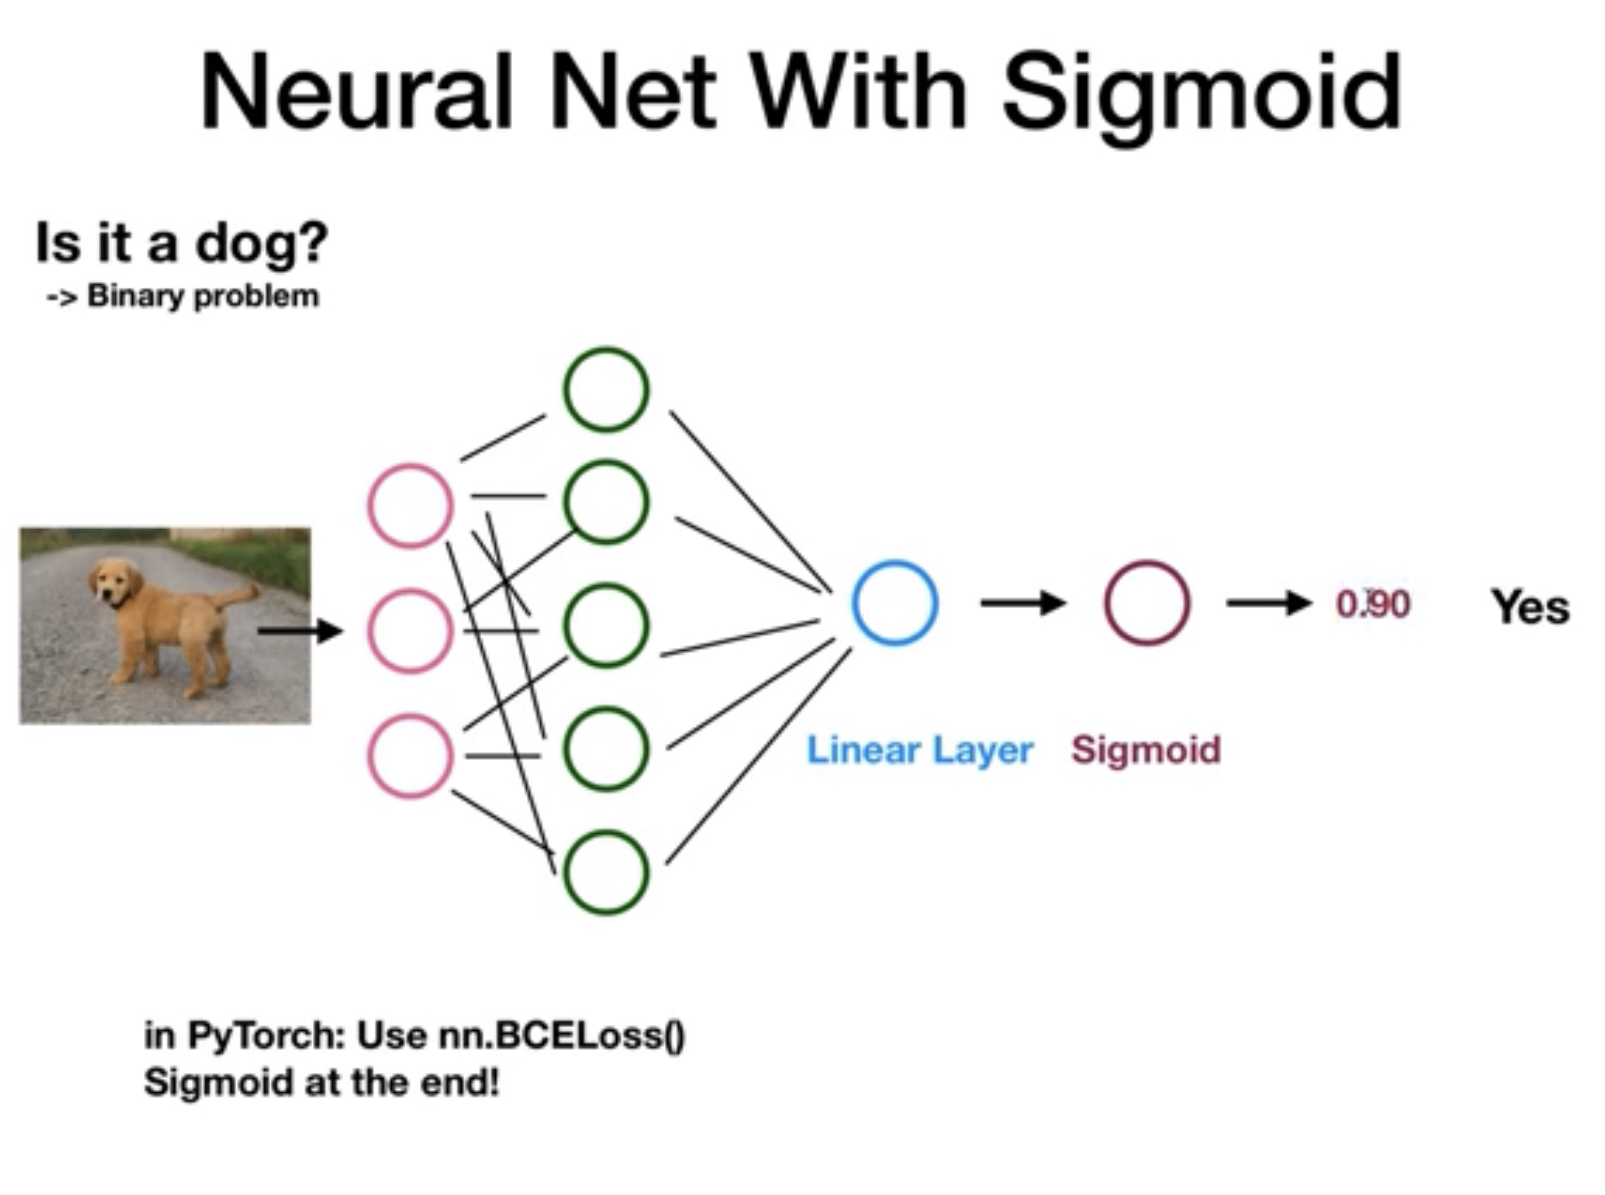

In [ ]:
# Binary classification
import torch
import torch.nn as nn
import numpy as np

class NeuralNet1(nn.Module):
def __init__(self, input_size, hidden_size):
super(NeuralNet1, self).__init__()
self.linear1 = nn.Linear(input_size, hidden_size) 
self.relu = nn.ReLU()
self.linear2 = nn.Linear(hidden_size, 1)  
def forward(self, x):
out = self.linear1(x)
out = self.relu(out)
out = self.linear2(out)
# sigmoid at the end
y_pred = torch.sigmoid(out)
return y_pred
model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

## ACTIVATION FUNCTIONS:


In [ ]:
# output = w*x + b
# output = activation_function(output)
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

#nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model.
#torch.relu on the other side is just the functional API call to the relu function,
#so that you can add it e.g. in your forward method yourself.

# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out